In [36]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

Imported function `get_value_data(files, columns)` -> dataframe of values
Imported function `get_value_data(files, columns)` -> dataframe of returns
Imported function `initialize_data()` -> tuple of value and returns data
Imported PairTradingTest
0.18187173709993393
0.3538758656001613
0.004085227224692463
0.6083708071041048
0.4966055703670485
0.43918531549258083
0.37889792645732717
0.08313195873856188
0.23526149661460916
0.15089704749024102
0.13538734816825204
0.1007094351108937
0.3877013412891899
0.7081701441335445
0.6048595730629904
0.5417681241161835
0.37871872762255654
0.33674903263165556
0.33899525054154556
0.3843054369809631
0.27921168518467243
0.17083602580130303
0.0714477537245617
0.24330901451323822
0.20357821136584558
0.24532463655749542
0.23013869587643565
0.2510816917700768
0.1747447347611914
0.24201383675303784
0.0685906123656545
0.04470521403886378
0.05227159425391207
0.1338961326011754
0.09916448608948242
0.004431745372417466
0.7935044682250876
0.979902065664578
0.993165

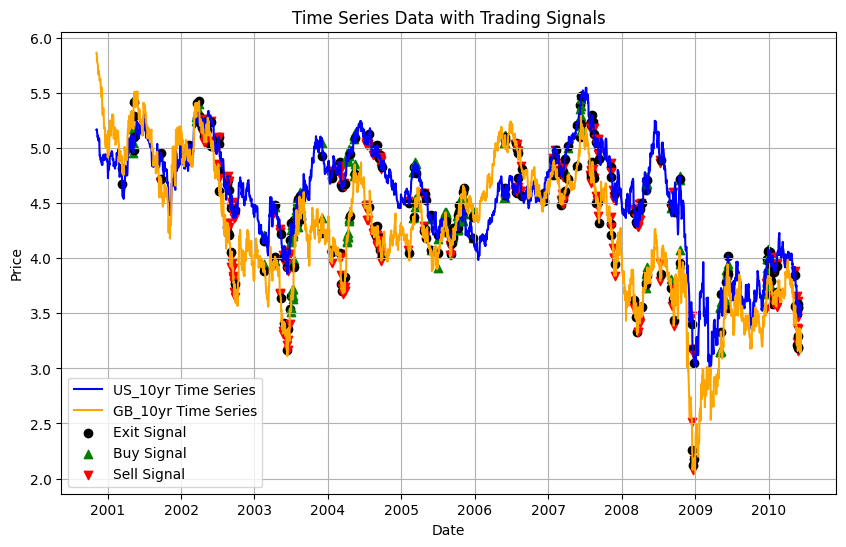

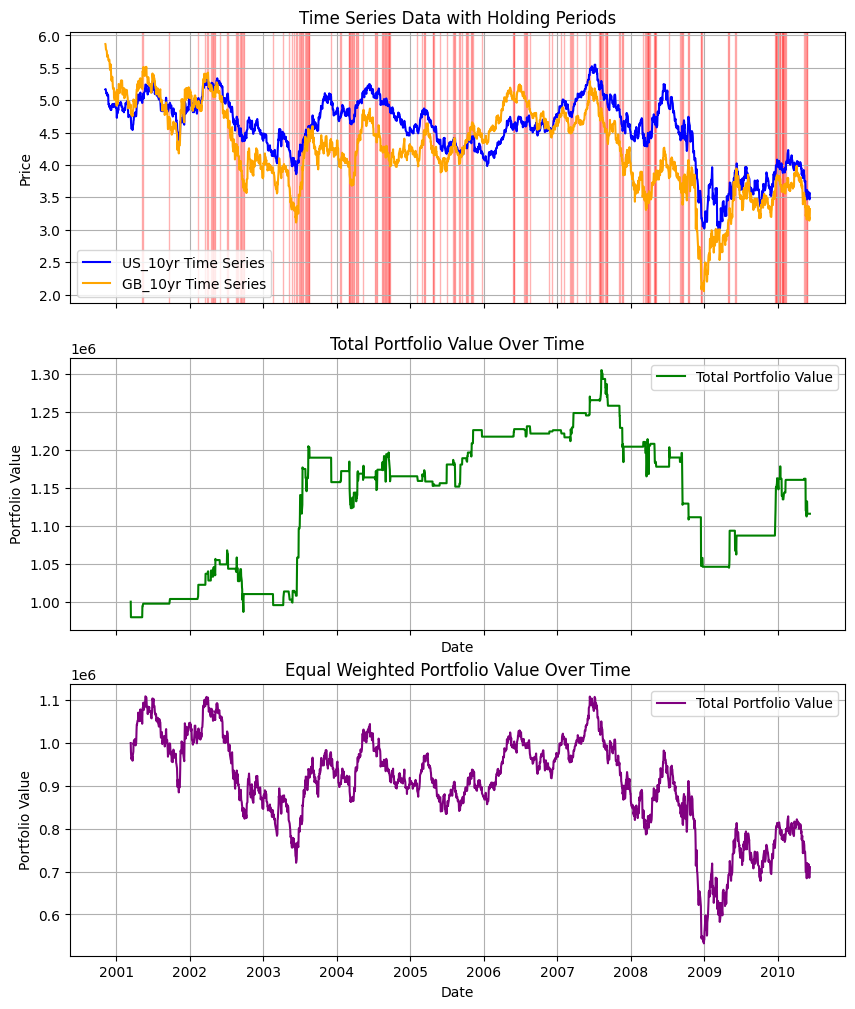

            US_10yr_Position  GB_10yr_Position  Cash_Position
Date                                                         
2001-03-13     483350.268119     516649.731881   0.000000e+00
2001-03-14          0.000000          0.000000   9.794695e+05
2001-03-15          0.000000          0.000000   9.794695e+05
2001-03-16          0.000000          0.000000   9.794695e+05
2001-03-19          0.000000          0.000000   9.794695e+05
2001-03-20          0.000000          0.000000   9.794695e+05
2001-03-21          0.000000          0.000000   9.794695e+05
2001-03-22          0.000000          0.000000   9.794695e+05
2001-03-23          0.000000          0.000000   9.794695e+05
2001-03-26          0.000000          0.000000   9.794695e+05
2001-03-27          0.000000          0.000000   9.794695e+05
2001-03-28          0.000000          0.000000   9.794695e+05
2001-03-29          0.000000          0.000000   9.794695e+05
2001-03-30          0.000000          0.000000   9.794695e+05
2001-04-

In [37]:
%run data.py

In [50]:
# finding the sharpe ratio
portfolio_returns = strategy.portfolio.sum(axis=1).diff()
print(portfolio_returns)
daily_risk_free_rate = .05/250 # assuming 250 trading days in a year
excess_returns = portfolio_returns - daily_risk_free_rate
mean = np.mean(excess_returns)
std_dev = np.std(excess_returns)

# Calculate the Sharpe Ratio
sharpe_ratio = mean / std_dev
annualized_sharpe_ratio = sharpe_ratio * 250**(1/2)
print(sharpe_ratio)
print()

Date
2001-03-13             NaN
2001-03-14   -2.053054e+04
2001-03-15    0.000000e+00
2001-03-16    0.000000e+00
2001-03-19    0.000000e+00
2001-03-20    0.000000e+00
2001-03-21    0.000000e+00
2001-03-22    0.000000e+00
2001-03-23    0.000000e+00
2001-03-26    0.000000e+00
2001-03-27    0.000000e+00
2001-03-28    0.000000e+00
2001-03-29    0.000000e+00
2001-03-30    0.000000e+00
2001-04-02    0.000000e+00
2001-04-03    0.000000e+00
2001-04-04    0.000000e+00
2001-04-05    0.000000e+00
2001-04-06    0.000000e+00
2001-04-09    0.000000e+00
2001-04-10    0.000000e+00
2001-04-11    0.000000e+00
2001-04-12    0.000000e+00
2001-04-13    0.000000e+00
2001-04-16    0.000000e+00
2001-04-17    0.000000e+00
2001-04-18    0.000000e+00
2001-04-19    0.000000e+00
2001-04-20    0.000000e+00
2001-04-23    0.000000e+00
2001-04-24    0.000000e+00
2001-04-25    0.000000e+00
2001-04-26    0.000000e+00
2001-04-27    0.000000e+00
2001-04-30    0.000000e+00
2001-05-01    0.000000e+00
2001-05-02    0.000000e

In [51]:
# equal weighted portfolio sharpe
eq_portfolio_returns = strategy.ew_portfolio.sum(axis=1).diff()
ew_excess_returns = eq_portfolio_returns - daily_risk_free_rate
ew_mean = np.mean(ew_excess_returns)
ew_std_dev = np.std(ew_excess_returns)

ew_sharpe_ratio = ew_mean/ew_std_dev
ew_annualized_sharpe_ratio = ew_sharpe_ratio * 250**(1/2)
print(ew_sharpe_ratio)
print(ew_annualized_sharpe_ratio)

-0.0011490208422735297
-0.01816761470294719


In [52]:
# correlation between our portfolio returns and equal weighted portfolio returns
eq_portfolio_returns.corr(portfolio_returns)

0.3322064279877799

In [53]:
series = {"US_10yr_2000.csv": "US_10yr", "GB_10yr_2000.csv": "GB_10yr"}
data = initialize_data(**series)
coint(data.data.iloc[:,0],data.data.iloc[:,1])

(-2.9934243705489187,
 0.11177679950857483,
 array([-3.89827144, -3.33715143, -3.04515895]))

0.6083708071041048


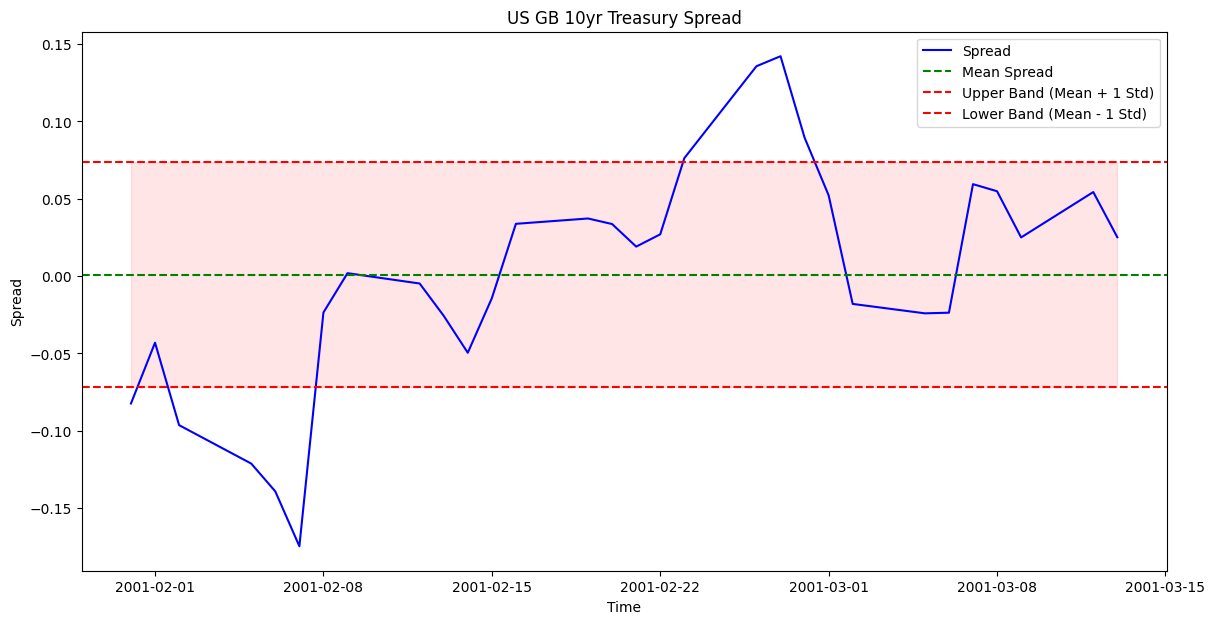

In [54]:
# graph the spread between the two series over a some timeframe

past_data = data.data.iloc[60:90]
coint(past_data.iloc[:,0],past_data.iloc[:,1])
_, beta_vals = find_coint(past_data.iloc[:,0],past_data.iloc[:,1])
spread = past_data.iloc[:, 0] - beta_vals[1] * past_data.iloc[:, 1]
# Calculate mean and standard deviation of the spread
spread_mean = np.mean(spread)
spread_std = np.std(spread)

# Calculate the upper and lower bands
upper_band = spread_mean + spread_std
lower_band = spread_mean - spread_std

# Create a time index for plotting
time_index = past_data.index

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(time_index, spread, label='Spread', color='blue')
plt.axhline(spread_mean, color='green', linestyle='--', label='Mean Spread')
plt.axhline(upper_band, color='red', linestyle='--', label='Upper Band (Mean + 1 Std)')
plt.axhline(lower_band, color='red', linestyle='--', label='Lower Band (Mean - 1 Std)')

plt.fill_between(time_index, lower_band, upper_band, color='red', alpha=0.1)

plt.title('US GB 10yr Treasury Spread')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.show()

# Pair Trading Strategy based on cointegration

In [55]:
# Given a linear combination (analyzed from prior juypter notebooks) of the price data of two bonds at each time point
# When the zero score goes above or below 95% threshold, i.e. there is only a 5% probability that the bonds price should be in that range, 
# know that the bonds are likely diverging and should converge
# Our signal is this divergence.
# Buy when Z score +- 2, and sell when the z-score dips back within the +- 2 band.

strategy :PairTradingTest = PairTradingTest(data,30,.5)
strategy.__backtest__()

pd.set_option('display.max_rows', None)



0.18187173709993393
0.3538758656001613
0.004085227224692463
0.6083708071041048
0.4966055703670485
0.43918531549258083
0.37889792645732717
0.08313195873856188
0.23526149661460916
0.15089704749024102
0.13538734816825204
0.1007094351108937
0.3877013412891899
0.7081701441335445
0.6048595730629904
0.5417681241161835
0.37871872762255654
0.33674903263165556
0.33899525054154556
0.3843054369809631
0.27921168518467243
0.17083602580130303
0.0714477537245617
0.24330901451323822
0.20357821136584558
0.24532463655749542
0.23013869587643565
0.2510816917700768
0.1747447347611914
0.24201383675303784
0.0685906123656545
0.04470521403886378
0.05227159425391207
0.1338961326011754
0.09916448608948242
0.004431745372417466
0.7935044682250876
0.979902065664578
0.9931657072565708
0.9743809274805881
0.9898309425860258
0.9890455180706098
0.9785927529306578
0.0008797054246101873
0.0008065401242943029
0.021903007134812677
0.26207105509604833
0.09983706432027417
0.3978455215428281
0.8685178840652077
0.659397690460485

In [56]:
print(strategy.portfolio.sum(axis=1).corr(data.data.iloc[:,0]))
print(strategy.portfolio.sum(axis=1).corr(data.data.iloc[:,1]))
print(strategy.portfolio.sum(axis=1).corr(strategy.ew_portfolio.sum(axis=1)))


# moderately correlated with the assets prices

0.4193702896225647
0.42835688255344373
0.4302614194279162


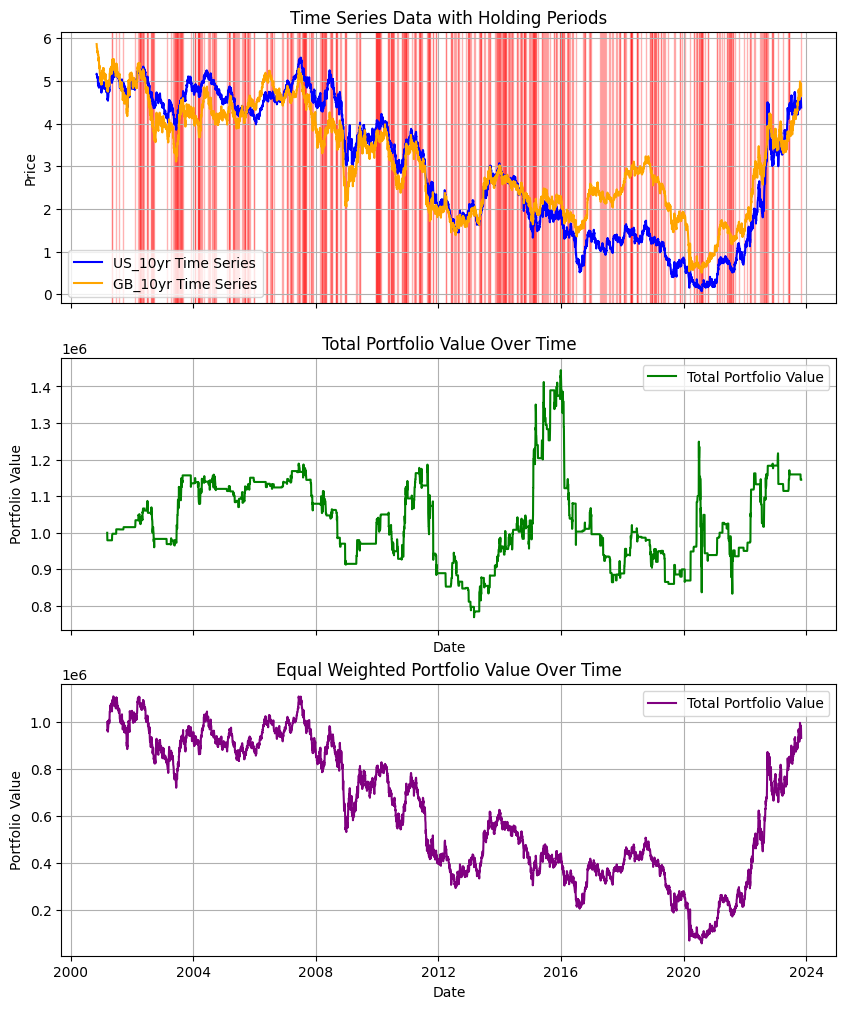

In [57]:
strategy.plot_time_series_and_portfolio()

0.004085227224692463
0.004085227224692463
0.2768997266795783
0.3893286395332257
0.6480302307492515
0.7636317277462663
0.5367409625287416
0.5339355834936615
0.7106063519520975
0.615063951582003
0.547564513648234
0.552049394776781
0.5549120979363863
0.4095872049591031
0.3581964009818016
0.24942206800618566
0.20336673657490723
0.24558002225392928
0.18285819030539813
0.0989089573764873
0.021124639336939442
0.03721756430684619
0.027787043934180834
0.024977924192794047
0.03435404469093889
0.015721032099833547
0.01508536984111417
0.026570565233887757
0.013823542683144965
0.010579456630338189
0.01251138404841307
0.019524175598554037
0.00851945396612415
0.004566455217535502
0.002552013856646917
0.0017683036122353596
0.002125332410550308
0.002722977943248486
0.0034082155465747074
0.0026774914584849468
0.0027264042436474355
0.00221764142610261
0.0008970155042311376
0.015178914229180966
0.03969302493623191
0.01964949625565546
0.024929679288526595
0.05582873903114725
0.04191289010483906
0.025534552

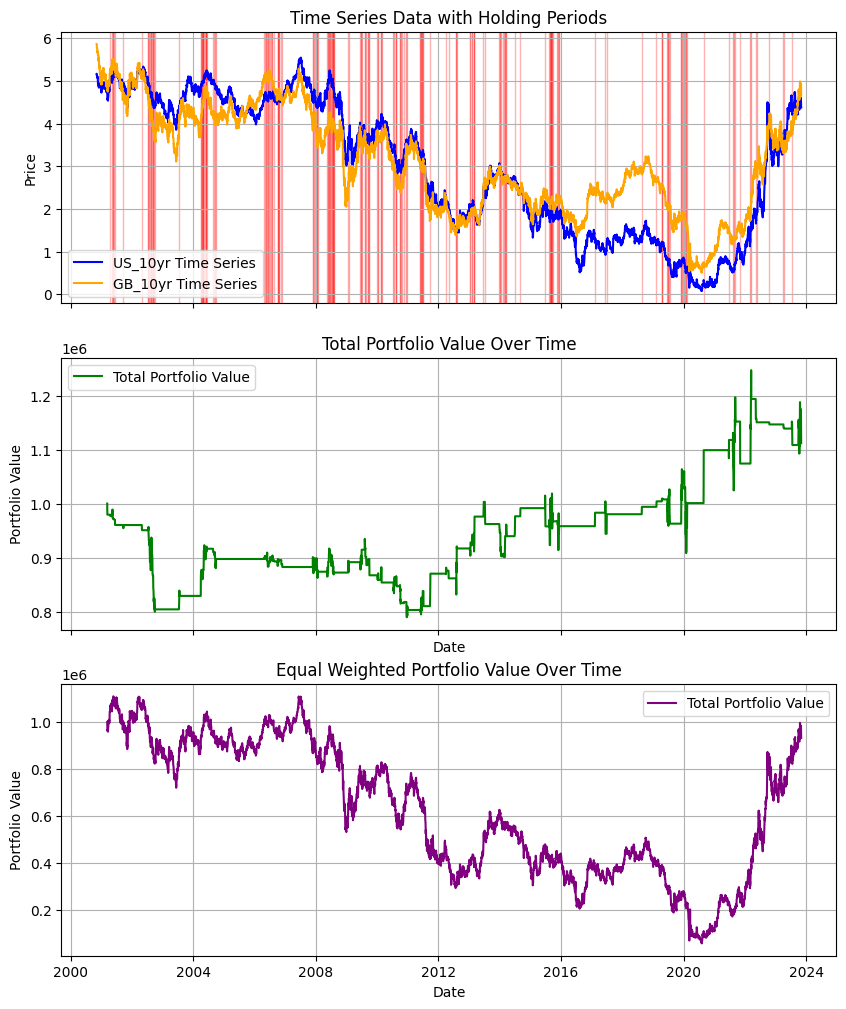

In [58]:
strategy :PairTradingTest = PairTradingTest(data,90,1)
strategy.__backtest__()
strategy.plot_time_series_and_portfolio()

In [63]:
# indicies
series = {"PanEuroAggIdx_2000.csv": "PanEuroIdx", "JPY_10yr_2000.csv": "JPY_10yr"}
idx_data = initialize_data(**series)
print(idx_data.data)
coint(idx_data.data.iloc[:,0],idx_data.data.iloc[:,1])

            PanEuroIdx  JPY_10yr
Date                            
2000-11-07       1.815  104.9184
2000-11-08       1.810  104.8983
2000-11-09       1.800  104.9480
2000-11-10       1.804  105.0228
2000-11-13       1.776  105.3412
2000-11-14       1.782  105.2628
2000-11-15       1.780  105.2965
2000-11-21       1.704  105.5359
2000-11-22       1.710  105.8350
2000-11-24       1.673  105.8363
2000-11-27       1.683  105.9237
2000-11-28       1.703  106.0469
2000-11-29       1.670  106.0182
2000-11-30       1.615  106.0956
2000-12-01       1.629  106.2325
2000-12-04       1.639  106.4320
2000-12-05       1.599  106.4390
2000-12-06       1.623  106.5262
2000-12-07       1.563  106.4982
2000-12-08       1.589  106.4948
2000-12-11       1.635  106.7226
2000-12-12       1.640  106.6656
2000-12-13       1.689  106.9789
2000-12-14       1.654  107.0914
2000-12-15       1.640  107.1796
2000-12-18       1.682  107.2872
2000-12-19       1.645  107.1088
2000-12-20       1.576  107.0988
2000-12-21

(-2.875118680627169,
 0.14294930080257934,
 array([-3.89834602, -3.33719302, -3.04518781]))

0.3181003293136998
0.14573184199388012
0.3118280162593846
0.11354131678832052
0.03266286361848358
0.3463976248248023
0.36829326249076066
0.2219568889836796
0.3426621173933474
0.36312410176776944
0.4834149990323622
0.8886633318068315
0.899356739066911
0.6768064510134003
0.767896939879257
0.926972351332913
0.9496829510925364
0.9426213204955289
0.9474399876287274
0.9427351078318782
0.8708909792729914
0.7641019500607977
0.6840600477919866
0.6292725171793733
0.5063078983283599
0.7962296847405204
0.7293856102851621
0.7263626484185082
0.5323734235323225
0.48297398208566256
0.2024588504951345
0.038734488669153834
0.17671865609222126
0.009671049364428416
0.07136923992257346
0.06570626990031718
0.06222496043285949
0.042834201236054505
0.02211211758325231
0.9244585617667327
0.9526110156603965
0.9591055345564252
0.9568241254493389
0.0037180753880228885
6.313327120197627e-05
0.008449747606182799
0.1623427146296676
0.1273155673359324
0.12573217030577716
0.17533585036803978
0.16699441117091407
0.2130

C:\Users\Acer\Quantitative_Analysis\EDA_Bonds\nbs\data.py:281: RuntimeWarning: divide by zero encountered in scalar divide
  asset1_value = self.portfolio[-1][1]
C:\Users\Acer\Quantitative_Analysis\EDA_Bonds\nbs\data.py:285: RuntimeWarning: invalid value encountered in scalar multiply
  curr_asset1_value = asset1_value * (1 + asset1_curr_px - asset1_last_px)
C:\Users\Acer\Quantitative_Analysis\EDA_Bonds\nbs\data.py:292: RuntimeWarning: invalid value encountered in scalar multiply
  


0.5506103936889828
0.5604790564501988
0.6922264757480265
0.4414026989635456
0.4887894063054312
0.5302266729169889
0.586773841282433
0.9120702070640059
0.34275646461424547
0.3953778583982999
0.469237877480338
0.35141627593232416
0.4060091439949899
0.49889660184970414
0.6019605946917554
0.7160315896400062
0.4803625987915724
0.26055006613024656
0.15082923554707756
0.17456097715726654
0.2141056017238238
0.15545129525251472
0.3364912868060429
0.31222027075226055
0.15537858732557885
0.37977700649711776
0.6559845761902708
0.3817819672320849
0.44548592812791254
0.5033807368419373
0.37672259642041894
0.5180568831175109
0.5343404231664314
0.5272870798776365
0.24719981296182852
0.10485859045845403
0.2948428602481289
0.9063794049853284
0.3039410166981107
0.09689520089551584
0.18362474240415794
0.31229519101033626
0.5538027270073929
0.5378267419462156
0.6000869894031688
0.5588285252322464
0.18046712511367263
0.6287102276908241
0.636980837918098
0.49429748475507795
0.45847036333240904
0.462658922779

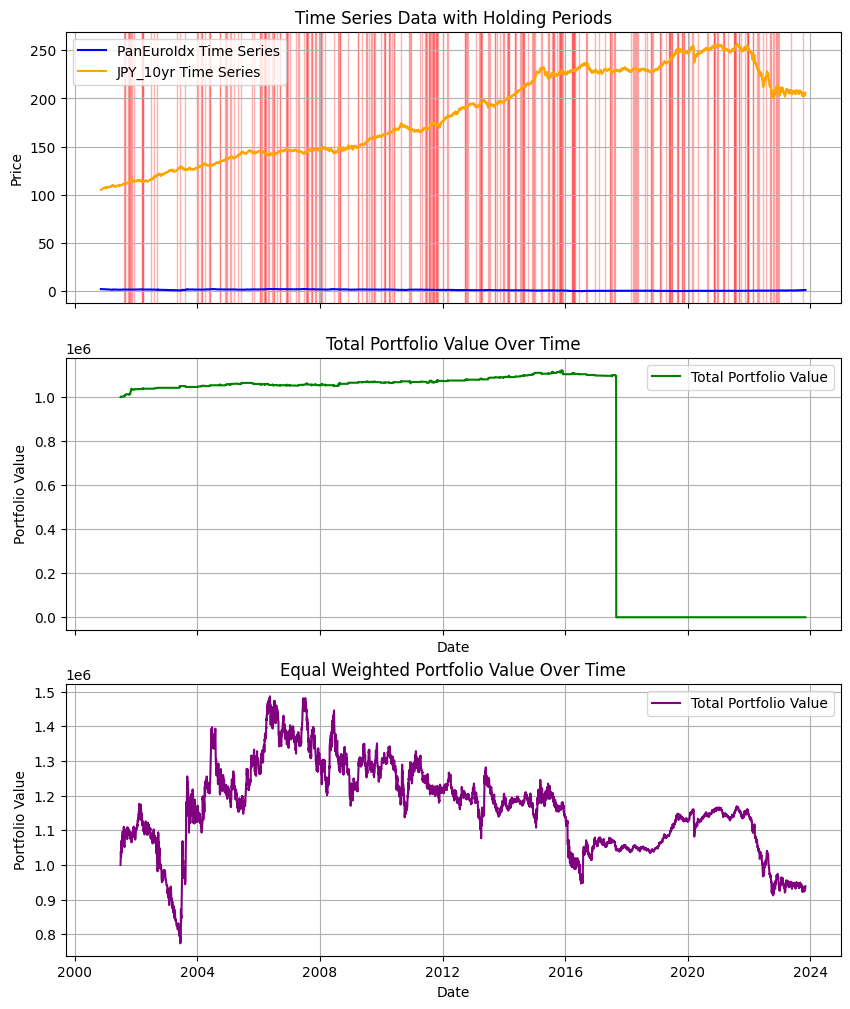

In [64]:
#idx_data.data = idx_data.data.iloc[:1000]
strategy :PairTradingTest = PairTradingTest(idx_data,30,1)
strategy.__backtest__()
strategy.plot_time_series_and_portfolio()

In [65]:
# try some other combinations

# How is there no cointegration between the US bond and US Index
series = {"USAggIdx_2000.csv": "US_15Min", "US_10yr_2000.csv": "GB_15Min"}
idx_data = initialize_data(**series)
print(idx_data.data)
coint(idx_data.data.iloc[:,0],idx_data.data.iloc[:,1])

            US_15Min  GB_15Min
Date                          
2000-11-07    897.54    5.8660
2000-11-08    898.10    5.8550
2000-11-09    899.86    5.8250
2000-11-10    899.97    5.7830
2000-11-13    901.83    5.7660
2000-11-14    902.54    5.7550
2000-11-15    904.00    5.7110
2000-11-16    905.23    5.6690
2000-11-17    903.90    5.7040
2000-11-20    904.47    5.6770
2000-11-21    904.70    5.6520
2000-11-22    907.41    5.6240
2000-11-24    906.63    5.6240
2000-11-27    906.72    5.6240
2000-11-28    908.26    5.5820
2000-11-29    910.05    5.5240
2000-11-30    913.73    5.4680
2000-12-01    911.58    5.5030
2000-12-04    912.20    5.5510
2000-12-05    916.20    5.4180
2000-12-06    920.48    5.3260
2000-12-07    921.18    5.3090
2000-12-08    920.13    5.2990
2000-12-11    920.02    5.3620
2000-12-12    920.58    5.3460
2000-12-13    923.58    5.2580
2000-12-14    926.24    5.2130
2000-12-15    927.02    5.1800
2000-12-18    927.90    5.1700
2000-12-19    927.00    5.1880
2000-12-

(-0.7422650049610598,
 0.9418800386372319,
 array([-3.89834404, -3.33719191, -3.04518704]))

In [71]:
series = {"PanEuroAggIdx_2000.csv": "PanEuro_10yr", "US_10yr_2000.csv": "US_10yr"}
idx_data = initialize_data(**series)
print(idx_data.data)
coint(idx_data.data.iloc[:,0],idx_data.data.iloc[:,1])

            PanEuro_10yr  US_10yr
Date                             
2000-11-07      104.9184   5.8660
2000-11-08      104.8983   5.8550
2000-11-09      104.9480   5.8250
2000-11-10      105.0228   5.7830
2000-11-13      105.3412   5.7660
2000-11-14      105.2628   5.7550
2000-11-15      105.2965   5.7110
2000-11-16      105.4125   5.6690
2000-11-17      105.4383   5.7040
2000-11-20      105.6004   5.6770
2000-11-21      105.5359   5.6520
2000-11-22      105.8350   5.6240
2000-11-23      105.7598   5.6120
2000-11-24      105.8363   5.6240
2000-11-27      105.9237   5.6240
2000-11-28      106.0469   5.5820
2000-11-29      106.0182   5.5240
2000-11-30      106.0956   5.4680
2000-12-01      106.2325   5.5030
2000-12-04      106.4320   5.5510
2000-12-05      106.4390   5.4180
2000-12-06      106.5262   5.3260
2000-12-07      106.4982   5.3090
2000-12-08      106.4948   5.2990
2000-12-11      106.7226   5.3620
2000-12-12      106.6656   5.3460
2000-12-13      106.9789   5.2580
2000-12-14    

(-1.3869631131282647,
 0.8019469812738041,
 array([-3.8983205 , -3.33717879, -3.04517793]))

In [72]:
strategy :PairTradingTest = PairTradingTest(idx_data,30,1)
strategy.__backtest__()

0.0033845623439995418
0.0033845623439995418
0.0028105421096943023
0.010805210660556314
0.16832646891776765
0.4302453241931611
0.10382081529195403
0.1994185061667052
0.15095715463371345
0.16719514583953615
0.06732942189376237
0.009617736053574393
0.13501486265653395
0.14409300555672033
0.14896479547518504
0.18365216412550356
0.20977105508290345
0.18088112659196087
0.21759325921933292
0.25153504143744443
0.3431435474712433
0.2889917536977835
0.29245599294082114
0.2552342507132571
0.29735376939123137
0.5187781385342652
0.416106078589426
0.36540396293646915
0.19473163509554303
0.07553215824289522
0.4519478000546393
0.3981738230567846
0.02318939025734862
0.579723117270509
0.5520056275609493
0.6919399316031161
0.8897557276354224
0.6230593710538186
0.011568820892277476
0.41976454180424494
0.9153598215185879
0.8177394930589463
0.7192343099691803
0.5778062818496074
0.5292617687321134
0.5868808925568785
0.37512200115862104
0.19816054345652645
0.23486528799688
0.6134014389010747
0.116479137172072

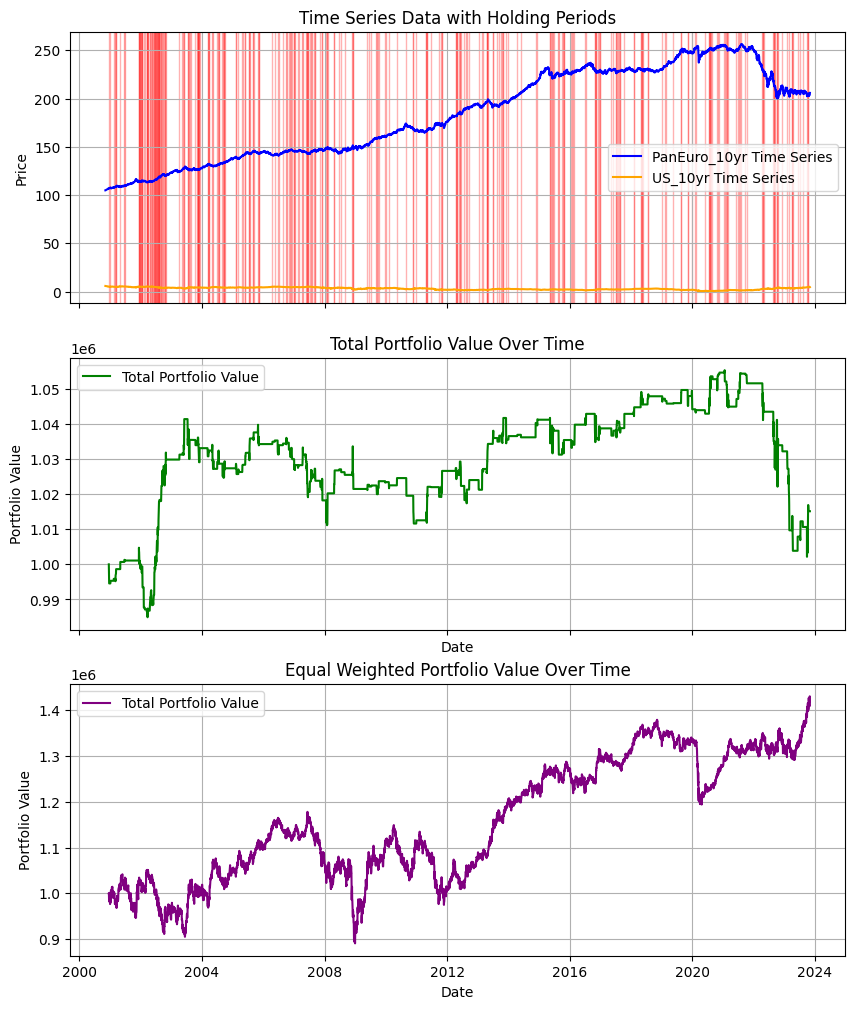

In [73]:
strategy.plot_time_series_and_portfolio()

In [78]:
print(coint(strategy.portfolio.sum(axis=1), strategy.ew_portfolio.sum(axis=1)))
print(strategy.portfolio.sum(axis=1).corr(strategy.ew_portfolio.sum(axis=1)))
print(strategy.portfolio.sum(axis=1).corr(strategy.data.data.iloc[:,0]))
print(strategy.portfolio.sum(axis=1).corr(strategy.data.data.iloc[:,1]))

(-2.8848463890091125, 0.14017451435627687, array([-3.89832991, -3.33718403, -3.04518157]))
0.6099739281035733
0.717334569391221
-0.6207219467475725


In [79]:
import quantstats as qs

In [80]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [81]:
qs.stats.sharpe(strategy.portfolio.sum(axis=1))

0.060692735403486936

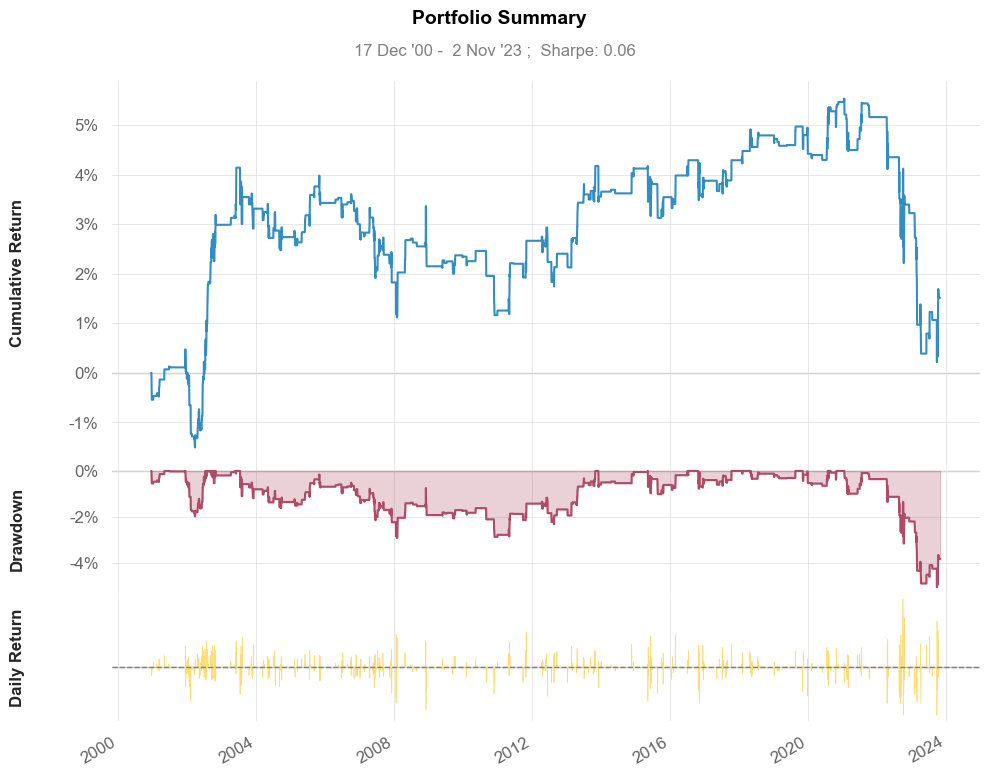

In [82]:
qs.plots.snapshot(strategy.portfolio.sum(axis=1))

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2000-12-19   2000-12-19
End Period                 2023-11-02   2023-11-02
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       11.0%

Cumulative Return          41.02%       1.51%
CAGR﹪                     1.04%        0.05%

Sharpe                     0.24         0.06
Prob. Sharpe Ratio         87.0%        61.46%
Smart Sharpe               0.21         0.05
Sortino                    0.34         0.09
Smart Sortino              0.3          0.08
Sortino/√2                 0.24         0.06
Smart Sortino/√2           0.21         0.06
Omega                      1.03         1.03

Max Drawdown               -24.38%      -5.04%
Longest DD Days            2276         3761
Volatility (ann.)          7.58%        1.19%
R^2                        0.0          0.0
Information Ratio          -0.01        -0.01
Calmar                 

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-01-21  2023-09-28  2023-11-02  1016     -5.041007         -4.734380
2  2003-07-15  2008-01-30  2013-10-30  3761     -2.903663         -2.836655
3  2001-12-13  2002-03-25  2002-07-12   212     -1.972965         -1.857777
4  2015-05-12  2015-08-24  2016-07-12   428     -1.006718         -0.973547
5  2016-10-26  2016-11-01  2018-01-30   462     -0.773751         -0.682818

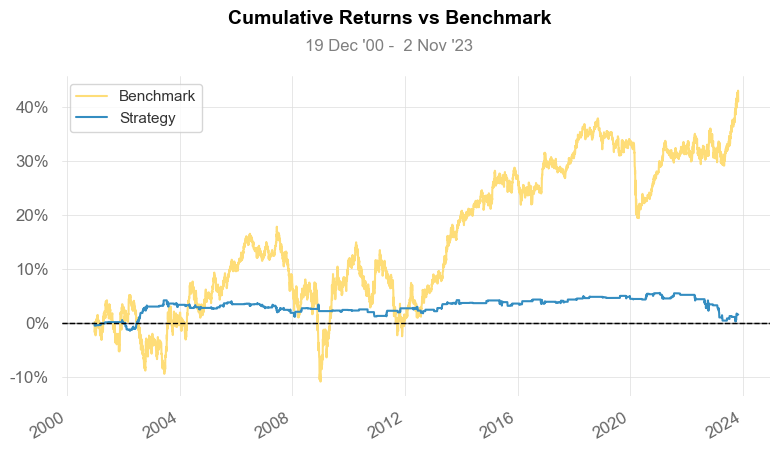

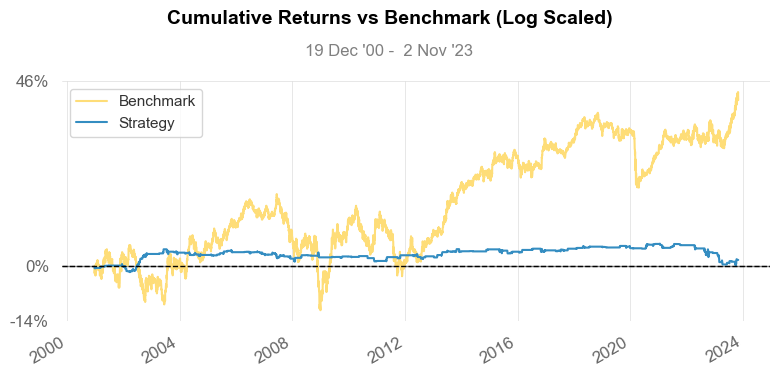

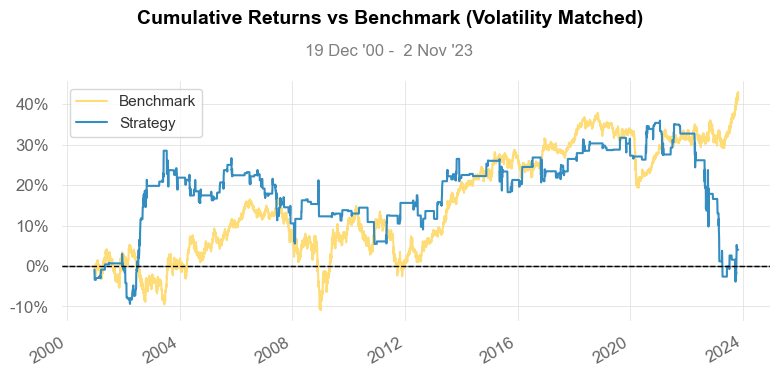

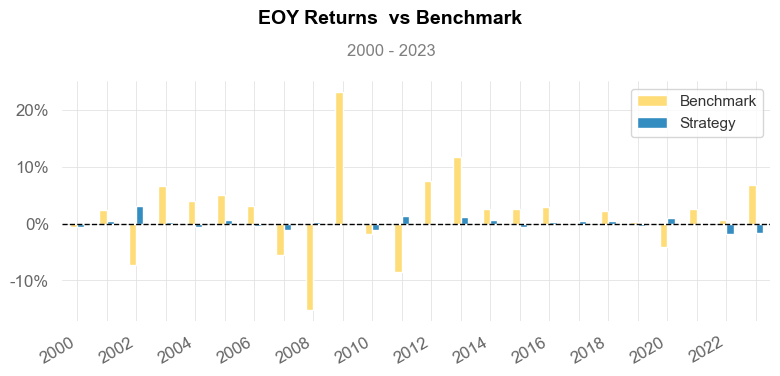

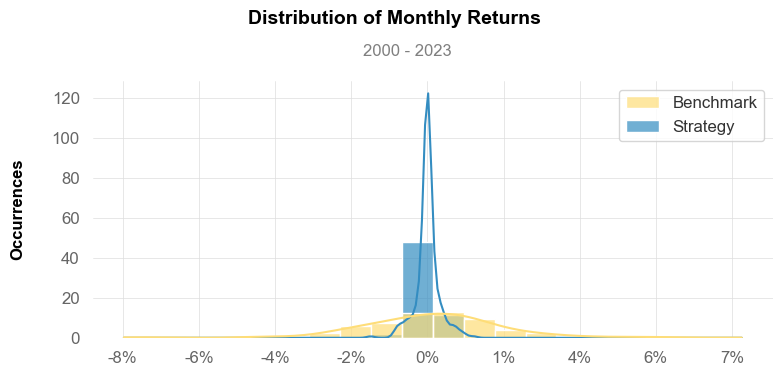

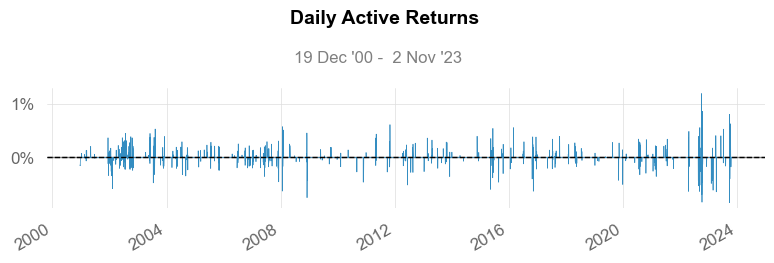

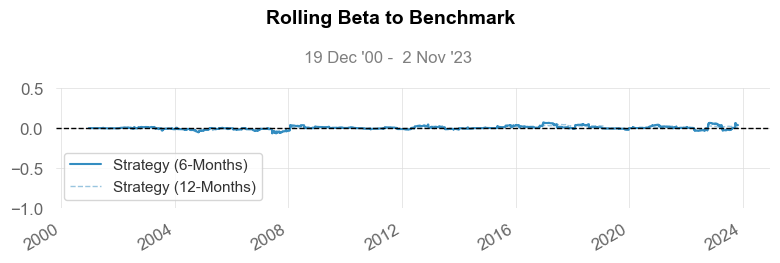

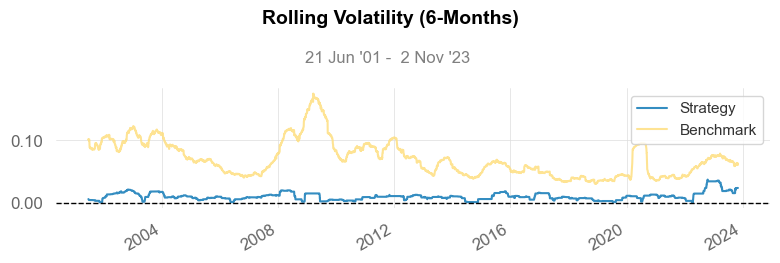

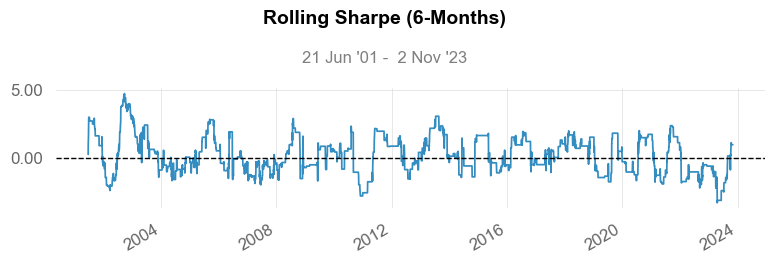

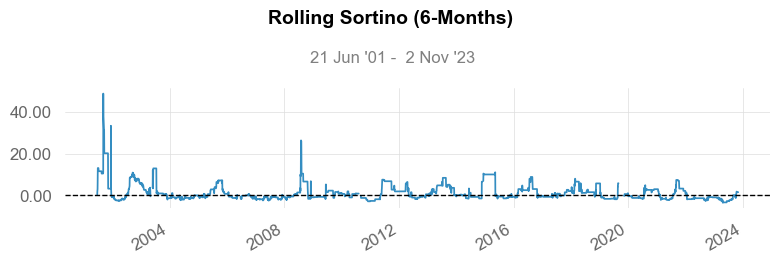

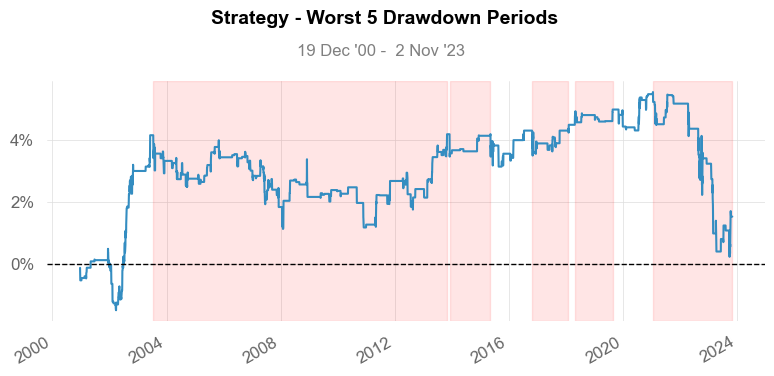

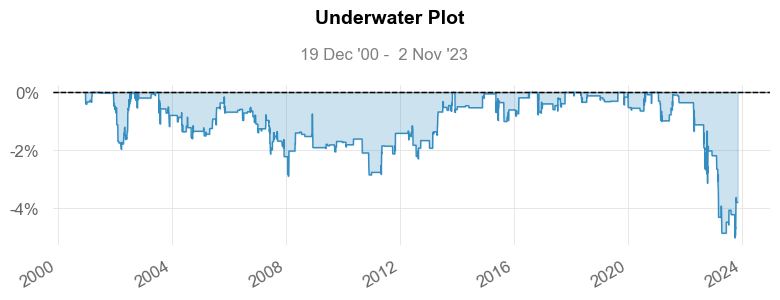

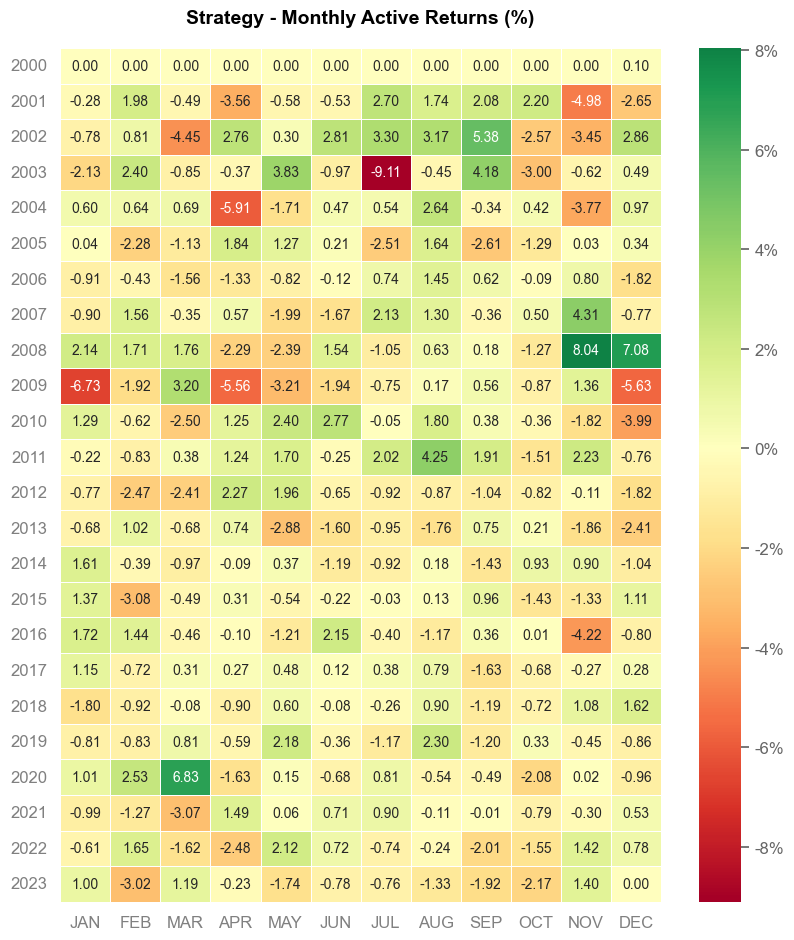

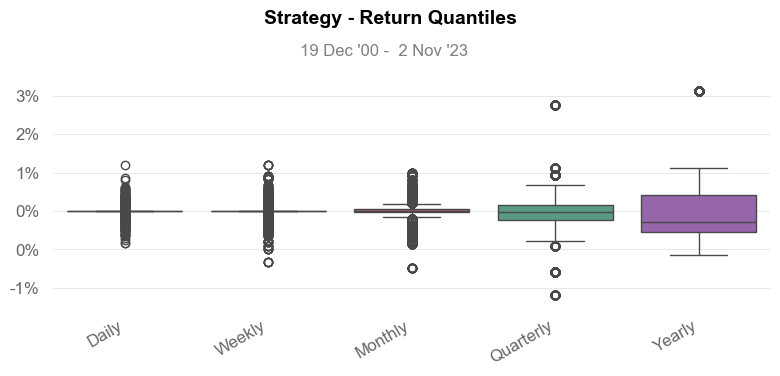

In [86]:
qs.reports.full(strategy.portfolio.sum(axis=1), benchmark=strategy.ew_portfolio.sum(axis=1))